In [1]:
import pandas as pd
pd.set_option('display.max_columns', 100)
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
df = pd.read_csv('Land_area.csv')
df.head(12)

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,NaN,NaN,NaN,0
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,NaN,NaN,NaN,0
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,NaN,NaN,NaN,0
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,NaN,..,NaN,NaN,0
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,NaN,..,NaN,NaN,0
5,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, forest",Square kilometres,280,units,0,v106960512,1.1.6,NaN,..,NaN,NaN,0
6,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, water",Square kilometres,280,units,0,v106960513,1.1.7,NaN,..,NaN,NaN,0
7,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, other type of cover",Square kilometres,280,units,0,v106960514,1.1.8,NaN,..,NaN,NaN,0
8,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area-ecosystem/census aggl...,Total land area,Square kilometres,280,units,0,v106960515,1.2.1,5313.0,NaN,NaN,NaN,0
9,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area-ecosystem/census aggl...,"Built-up area, settled",Square kilometres,280,units,0,v106960516,1.2.2,37.0,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 5568 non-null   int64  
 1   GEO                      5568 non-null   object 
 2   DGUID                    5568 non-null   object 
 3   Area                     5568 non-null   object 
 4   Land cover and land use  5568 non-null   object 
 5   UOM                      5568 non-null   object 
 6   UOM_ID                   5568 non-null   int64  
 7   SCALAR_FACTOR            5568 non-null   object 
 8   SCALAR_ID                5568 non-null   int64  
 9   VECTOR                   5568 non-null   object 
 10  COORDINATE               5568 non-null   object 
 11  VALUE                    2355 non-null   float64
 12  STATUS                   3213 non-null   object 
 13  SYMBOL                   0 non-null      float64
 14  TERMINATED              

In [4]:
df['STATUS'].unique()

array([nan, '..', 'F'], dtype=object)

In [5]:
#STATUS, SYMBOL and TERMINATED are useless columns
df = df.drop(columns = ['STATUS','SYMBOL','TERMINATED'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 5568 non-null   int64  
 1   GEO                      5568 non-null   object 
 2   DGUID                    5568 non-null   object 
 3   Area                     5568 non-null   object 
 4   Land cover and land use  5568 non-null   object 
 5   UOM                      5568 non-null   object 
 6   UOM_ID                   5568 non-null   int64  
 7   SCALAR_FACTOR            5568 non-null   object 
 8   SCALAR_ID                5568 non-null   int64  
 9   VECTOR                   5568 non-null   object 
 10  COORDINATE               5568 non-null   object 
 11  VALUE                    2355 non-null   float64
 12  DECIMALS                 5568 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 565.6+ KB


In [7]:
#fill the missing value with 0
df['VALUE'].fillna(0,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   REF_DATE                 5568 non-null   int64  
 1   GEO                      5568 non-null   object 
 2   DGUID                    5568 non-null   object 
 3   Area                     5568 non-null   object 
 4   Land cover and land use  5568 non-null   object 
 5   UOM                      5568 non-null   object 
 6   UOM_ID                   5568 non-null   int64  
 7   SCALAR_FACTOR            5568 non-null   object 
 8   SCALAR_ID                5568 non-null   int64  
 9   VECTOR                   5568 non-null   object 
 10  COORDINATE               5568 non-null   object 
 11  VALUE                    5568 non-null   float64
 12  DECIMALS                 5568 non-null   int64  
dtypes: float64(1), int64(4), object(8)
memory usage: 565.6+ KB


In [9]:
df['Land cover and land use'].unique()

array(['Total land area', 'Built-up area, settled',
       'Built-up area, roads', 'Arable',
       'Natural and semi-natural, total',
       'Natural and semi-natural, forest',
       'Natural and semi-natural, water',
       'Natural and semi-natural, other type of cover'], dtype=object)

In [10]:
df['Total_land_area'] = df.loc[df['Land cover and land use'] == 'Total land area']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN


In [11]:
df['Built-up_area_settled'] = df.loc[df['Land cover and land use'] == 'Built-up area, settled']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN


In [12]:
df['Built-up_area_roads'] = df.loc[df['Land cover and land use'] == 'Built-up area, roads']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN


In [13]:
df['Natural_and_semi-natural_total'] = df.loc[df['Land cover and land use'] == 'Natural and semi-natural, total']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0


In [14]:
df['Arable'] = df.loc[df['Land cover and land use'] == 'Arable']['VALUE']
df.head()

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN


In [15]:
df['Natural_and_semi-natural_forest'] = df.loc[df['Land cover and land use'] == 'Natural and semi-natural, forest']['VALUE']
df.head(8)

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN
5,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, forest",Square kilometres,280,units,0,v106960512,1.1.6,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0
6,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, water",Square kilometres,280,units,0,v106960513,1.1.7,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN
7,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, other type of cover",Square kilometres,280,units,0,v106960514,1.1.8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df['Natural_and_semi-natural_water'] = df.loc[df['Land cover and land use'] == 'Natural and semi-natural, water']['VALUE']
df.head(8)

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, forest",Square kilometres,280,units,0,v106960512,1.1.6,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN
6,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, water",Square kilometres,280,units,0,v106960513,1.1.7,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0
7,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, other type of cover",Square kilometres,280,units,0,v106960514,1.1.8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df['Natural_and_semi-natural_other_type_of_cover'] = df.loc[df['Land cover and land use'] == 'Natural and semi-natural, other type of cover']['VALUE']
df.head(8)

,REF_DATE,GEO,DGUID,Area,Land cover and land use,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Total land area,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, settled",Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Built-up area, roads",Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Arable,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, total",Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
5,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, forest",Square kilometres,280,units,0,v106960512,1.1.6,0.0,0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN
6,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, water",Square kilometres,280,units,0,v106960513,1.1.7,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
7,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,"Natural and semi-natural, other type of cover",Square kilometres,280,units,0,v106960514,1.1.8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
df = df.drop(columns=['Land cover and land use'])

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5568 entries, 0 to 5567
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   REF_DATE                                      5568 non-null   int64  
 1   GEO                                           5568 non-null   object 
 2   DGUID                                         5568 non-null   object 
 3   Area                                          5568 non-null   object 
 4   UOM                                           5568 non-null   object 
 5   UOM_ID                                        5568 non-null   int64  
 6   SCALAR_FACTOR                                 5568 non-null   object 
 7   SCALAR_ID                                     5568 non-null   int64  
 8   VECTOR                                        5568 non-null   object 
 9   COORDINATE                                    5568 non-null   o

In [20]:
df['Built-up_area_settled'] = df['Built-up_area_settled'].shift(-1)

In [21]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,7.0,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [22]:
df['Built-up_area_roads'] = df['Built-up_area_roads'].shift(-2)

In [23]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [24]:
df['Arable'] = df['Arable'].shift(-3)

In [25]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,NaN,0.0,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [26]:
df['Natural_and_semi-natural_total'] = df['Natural_and_semi-natural_total'].shift(-4)

In [27]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,0.0,0.0,NaN,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df['Natural_and_semi-natural_forest'] = df['Natural_and_semi-natural_forest'].shift(-5)

In [29]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,0.0,0.0,0.0,NaN,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
df['Natural_and_semi-natural_water'] = df['Natural_and_semi-natural_water'].shift(-6)

In [31]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,0.0,0.0,0.0,0.0,NaN
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df['Natural_and_semi-natural_other_type_of_cover'] = df['Natural_and_semi-natural_other_type_of_cover'].shift(-7)

In [33]:
df.head(13)

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0
1,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960508,1.1.2,11.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960509,1.1.3,7.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960510,1.1.4,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960511,1.1.5,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960512,1.1.6,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960513,1.1.7,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960514,1.1.8,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v106960515,1.2.1,5313.0,0,5313.0,37.0,23.0,4783.0,470.0,0.0,0.0,0.0
9,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v106960516,1.2.2,37.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = df.dropna()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 5560
Data columns (total 20 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   REF_DATE                                      696 non-null    int64  
 1   GEO                                           696 non-null    object 
 2   DGUID                                         696 non-null    object 
 3   Area                                          696 non-null    object 
 4   UOM                                           696 non-null    object 
 5   UOM_ID                                        696 non-null    int64  
 6   SCALAR_FACTOR                                 696 non-null    object 
 7   SCALAR_ID                                     696 non-null    int64  
 8   VECTOR                                        696 non-null    object 
 9   COORDINATE                                    696 non-null    object 

In [36]:
df.head()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
0,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960507,1.1.1,605.0,0,605.0,11.0,7.0,0.0,0.0,0.0,0.0,0.0
8,1971,Abbotsford - Mission (census metropolitan area...,2011S0503932,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v106960515,1.2.1,5313.0,0,5313.0,37.0,23.0,4783.0,470.0,0.0,0.0,0.0
16,1971,"Baie-Comeau (census agglomeration), Quebec",2011S0504406,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v122596342,37.1.1,1125.0,0,1125.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,1971,"Baie-Comeau (census agglomeration), Quebec",2011S0504406,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v122596350,37.2.1,6705.0,0,6705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
32,1971,"Barrie (census metropolitan area), Ontario",2011S0503568,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106960523,2.1.1,898.0,0,898.0,14.0,10.0,0.0,0.0,0.0,0.0,0.0


In [37]:
df['UOM_ID'].unique()

array([280], dtype=int64)

In [38]:
df = df.drop(columns = ['VALUE'])

In [39]:
df.tail()

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
5528,2011,"Windsor (census metropolitan area), Ontario",2011S0503559,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v106961027,33.2.1,0,2362.0,243.0,121.0,308.0,1690.0,59.0,31.0,218.0
5536,2011,"Winnipeg (census metropolitan area), Manitoba",2011S0503602,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v106961035,34.1.1,0,5303.0,303.0,256.0,0.0,0.0,0.0,0.0,0.0
5544,2011,"Winnipeg (census metropolitan area), Manitoba",2011S0503602,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v106961043,34.2.1,0,19111.0,494.0,618.0,7882.0,10118.0,2175.0,1793.0,3913.0
5552,2011,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v122598534,148.1.1,0,63137.0,904.0,43.0,0.0,0.0,0.0,0.0,0.0
5560,2011,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v122598542,148.2.1,0,139440.0,915.0,50.0,138475.0,0.0,102041.0,16025.0,20409.0


In [40]:
df = df.drop(df[(df['Total_land_area'] <=0)].index)

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 696 entries, 0 to 5560
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   REF_DATE                                      696 non-null    int64  
 1   GEO                                           696 non-null    object 
 2   DGUID                                         696 non-null    object 
 3   Area                                          696 non-null    object 
 4   UOM                                           696 non-null    object 
 5   UOM_ID                                        696 non-null    int64  
 6   SCALAR_FACTOR                                 696 non-null    object 
 7   SCALAR_ID                                     696 non-null    int64  
 8   VECTOR                                        696 non-null    object 
 9   COORDINATE                                    696 non-null    object 

In [42]:
df = df.drop(df[(df['Built-up_area_settled'] <=0) & (df['Built-up_area_roads'] <=0)].index)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420 entries, 0 to 5560
Data columns (total 19 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   REF_DATE                                      420 non-null    int64  
 1   GEO                                           420 non-null    object 
 2   DGUID                                         420 non-null    object 
 3   Area                                          420 non-null    object 
 4   UOM                                           420 non-null    object 
 5   UOM_ID                                        420 non-null    int64  
 6   SCALAR_FACTOR                                 420 non-null    object 
 7   SCALAR_ID                                     420 non-null    int64  
 8   VECTOR                                        420 non-null    object 
 9   COORDINATE                                    420 non-null    object 

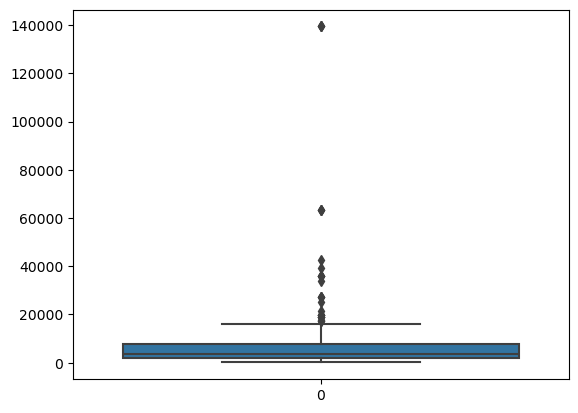

In [44]:
sns.boxplot(df.Total_land_area)
plt.show()

In [45]:
df.Total_land_area.sort_values().tail(15)

4792     27089.0
3400     27089.0
5064     33956.0
408      35921.0
3192     35921.0
1800     35921.0
4584     35921.0
4936     39377.0
4664     42533.0
4160     63137.0
5552     63137.0
2768     63137.0
4168    139440.0
2776    139440.0
5560    139440.0
Name: Total_land_area, dtype: float64

In [46]:
df[df.Total_land_area == 139440.0]

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
2776,1991,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v122598542,148.2.1,0,139440.0,177.0,47.0,139216.0,0.0,0.0,0.0,0.0
4168,2001,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v122598542,148.2.1,0,139440.0,281.0,47.0,139111.0,0.0,0.0,0.0,0.0
5560,2011,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area-ecosystem/census aggl...,Square kilometres,280,units,0,v122598542,148.2.1,0,139440.0,915.0,50.0,138475.0,0.0,102041.0,16025.0,20409.0


In [47]:
df[df.Total_land_area == 63137.0]

,REF_DATE,GEO,DGUID,Area,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,DECIMALS,Total_land_area,Built-up_area_settled,Built-up_area_roads,Natural_and_semi-natural_total,Arable,Natural_and_semi-natural_forest,Natural_and_semi-natural_water,Natural_and_semi-natural_other_type_of_cover
2768,1991,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v122598534,148.1.1,0,63137.0,167.0,40.0,0.0,0.0,0.0,0.0,0.0
4160,2001,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v122598534,148.1.1,0,63137.0,271.0,40.0,0.0,0.0,0.0,0.0,0.0
5552,2011,"Wood Buffalo (census agglomeration), Alberta",2011S0504860,Census metropolitan area/census agglomeration,Square kilometres,280,units,0,v122598534,148.1.1,0,63137.0,904.0,43.0,0.0,0.0,0.0,0.0,0.0


In [49]:
df = df.drop([2768,4160,5552,2776,4168,5560])

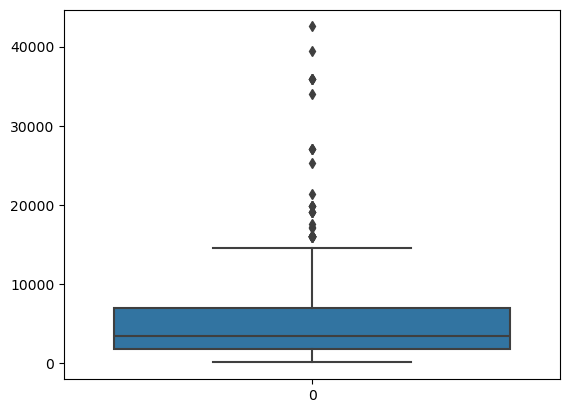

In [50]:
sns.boxplot(df.Total_land_area)
plt.show()

In [51]:
df.to_csv('cleaned_land_area.csv', index=None)